In [58]:
from sklearn.metrics import confusion_matrix
# y_actu = [2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2]
# y_pred = [0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2]
import pandas as pd
df = pd.read_csv('8.csv')
confusion_matrix(df['ground'], df['mapped'])



array([[44]])

In [50]:
from sklearn.metrics import confusion_matrix
# y_actu = [2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2]
# y_pred = [0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2]
import pandas as pd
df = pd.read_csv('1.csv')
confusion_matrix(df[''], df[''])

array([[3, 0, 2],
       [0, 1, 1],
       [0, 2, 3]])

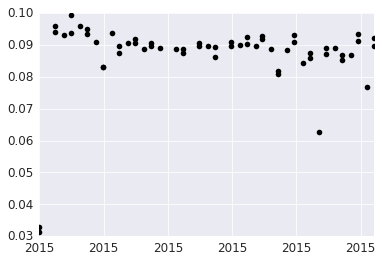

In [48]:
%matplotlib inline
import math
import ee; ee.Initialize()
import datetime
from matplotlib import dates
import matplotlib.dates as mdates
from pylab import *

def cloudmask(img):
    cloudscore = ee.Algorithms.Landsat.simpleCloudScore(img).select('cloud');
    return img.mask(cloudscore.lt(50));
def addndvi(img):    
    return img.addBands(img.normalizedDifference(['B5', 'B4']).select([0],['NDVI']));
def harmon(img):
    tstamp = ee.Date(img.get('system:time_start'));
    tdelta = tstamp.difference(time_reference, 'year');  
    img_fitting = img.select().addBands(1).addBands(tdelta.multiply(2*math.pi).sin()).addBands(tdelta.multiply(2*math.pi).cos()).addBands(img.select('NDVI')).toDouble();
    return img_fitting    

AMPLITUDE_THRESHOLD = 0.0
AMPLITUDE_MULTIPLIER = 5
start, end, time_reference= '2015-01-01', '2016-01-01', '2015-01-01'
imgs = ee.ImageCollection('LANDSAT/LC8_L1T_TOA').filterDate(start, end).map(cloudmask).map(addndvi).map(harmon)

point = {'type':'Point', 'coordinates':[ -116.88629,36.56122]};  # death valley (should be stable)
info = imgs.getRegion(point,500).getInfo()
# extract the header column names
header = info[0]
# print(header)
# create a Numpy array of the data
data = array(info[1:])

# extract the time information
iTime = header.index('time')
# convert to Python datetime objects
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]
xBand = 'time'
yBandList = ['longitude', 'latitude', 'time', 'NDVI']        

iTime = header.index('time')
# convert to Python datetime objects
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

iBands = [header.index(b) for b in yBandList]
yData = data[0:,iBands].astype(np.float)
ndvi = yData[:,-1]

fig, ax2 = plt.subplots()
ax2.plot(time, ndvi, 'o', color="black", label="NDVI")
ax2.grid(True)
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 64.5))

# # Format the ticks.
# years    = mdates.YearLocator()   # every year
# months   = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')

# ax2.set_ylabel('NDVI')

# ax2.xaxis.set_major_locator(years)
# ax2.xaxis.set_major_formatter(yearsFmt)
# ax2.xaxis.set_minor_locator(months)



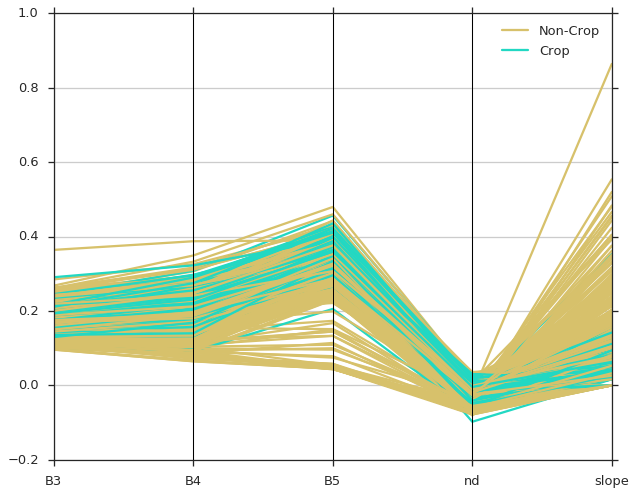

In [74]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
df = pd.read_csv('crop_sig.csv')
cols = 'idx crop'.split()
df['slope'] /= 57.2958
df = df.drop(cols,1)
from pandas.tools.plotting import parallel_coordinates
fig, ax = plt.subplots(figsize=(10,8))
parallel_coordinates(df, 'type')

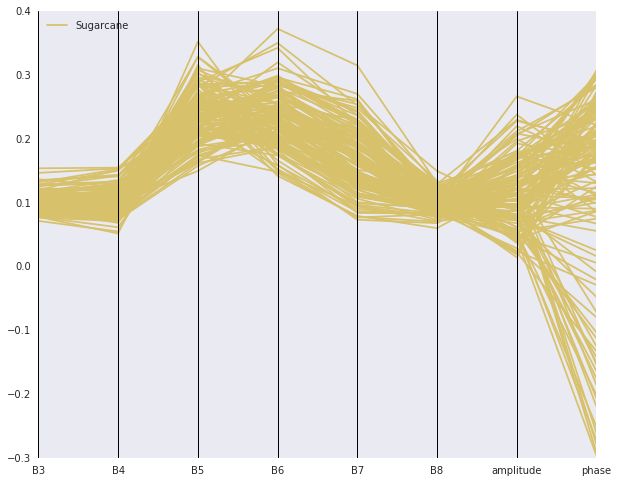

In [21]:
%matplotlib inline
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
# df = pd.read_csv('SA_full_sites.csv')
df = pd.read_csv('SA_sugar_sites2.csv')

cols = 'idx B1 B2 B9 B10 B11 BQA class'.split()
df = df.drop(cols,1)
df['phase'] /= 10
df = df[df['croptype'] != 'Others']
# df = df.sample(200)
from pandas.tools.plotting import parallel_coordinates
fig, ax = plt.subplots(figsize=(10,8))

parallel_coordinates(df, 'croptype')
# plt.subplot(122,figsize=(10,8))
# df2 = df[df['croptype'] == 'Corn']
# parallel_coordinates(df2, 'croptype')
# plt.subplot(133)
# df3 = df[df['croptype'] == 'Others']
# parallel_coordinates(df3, 'croptype')


plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

# with sns.axes_style("darkgrid"):
#     sns.set_palette(sns.color_palette(["#2ca25f", "#f03b20"]))
#     sns.set_context("notebook", font_scale=1.8, rc={"lines.linewidth": 2.5})
#     sns.pairplot(df, hue="class", size=5, vars=["conv", "NDWI", "Precip"])

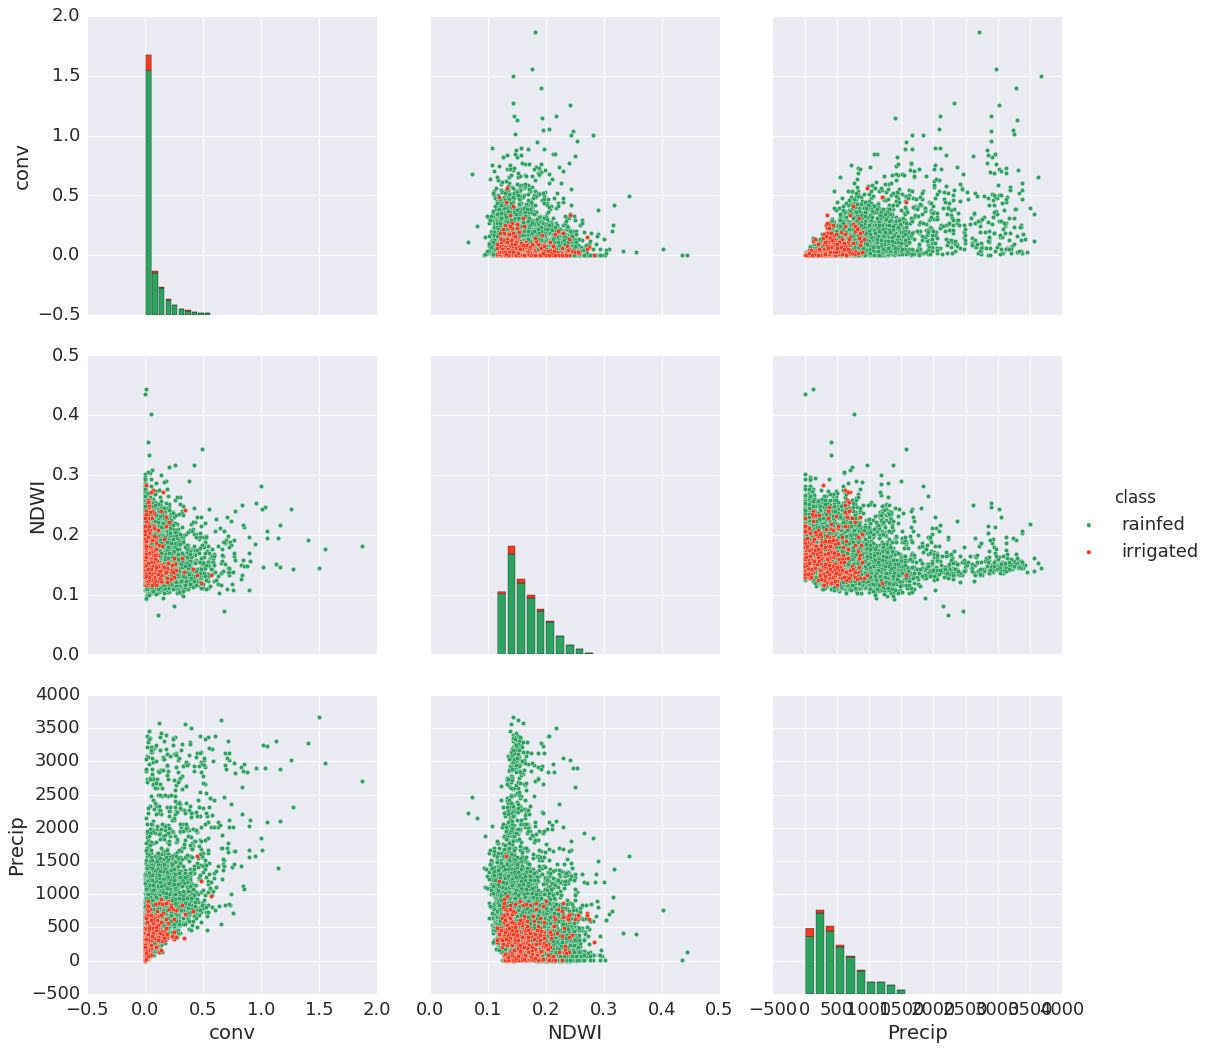

In [31]:
%matplotlib inline
import pandas as pd, seaborn as sns
# df = pd.read_csv('irrigated_samples.csv')
# df = pd.read_csv('irri_samples.csv')
df = pd.read_csv('irri_samples4.csv')
# irri_samples3
df['conv'] /= 10
df['NDWI']
with sns.axes_style("darkgrid"):
    sns.set_palette(sns.color_palette(["#2ca25f", "#f03b20"]))
    sns.set_context("notebook", font_scale=1.8, rc={"lines.linewidth": 2.5})
    sns.pairplot(df, hue="class", size=5, vars=["conv", "NDWI", "Precip"])

In [1]:
%matplotlib inline
import pandas as pd
# https://github.com/suredream/geenotebook/blob/master/IRRI_NDWI.csv
url = 'https://raw.githubusercontent.com/suredream/geenotebook/master/IRRI_NDWI.csv'
url = 'https://raw.githubusercontent.com/suredream/geenotebook/master/irri_chart.csv'
# https://github.com/suredream/geenotebook/blob/master/irrigation-indice.csv
iris = pd.read_csv(url)
import seaborn as sns
sns.pairplot(iris, hue="l2", size=3, vars=["IRRI", "NDVI"])
sns.set(style="white", color_codes=True)
# sns.pairplot(iris, hue="l2", size=3)

HTTPError: HTTP Error 404: Not Found

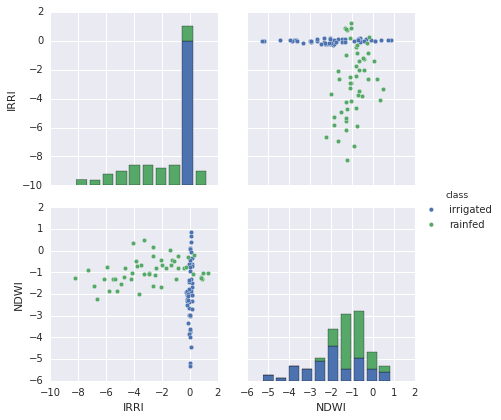

In [3]:
url = 'https://raw.githubusercontent.com/suredream/geenotebook/master/irri_chart.csv'
# https://github.com/suredream/geenotebook/blob/master/irrigation-indice.csv
iris = pd.read_csv(url)
import seaborn as sns
sns.pairplot(iris, hue="class", size=3, vars=["IRRI", "NDWI"])
sns.set(style="white", color_codes=True)
# sns.pairplot(iris, hue="l2", size=3)

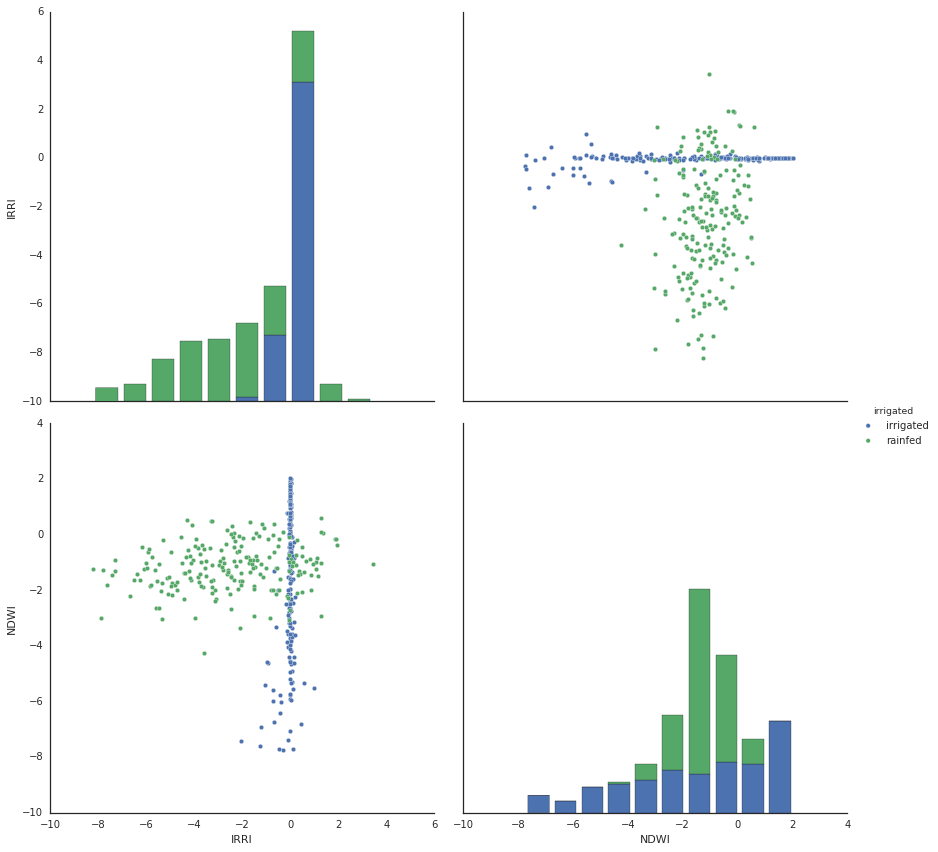

In [4]:
url = 'https://raw.githubusercontent.com/suredream/geenotebook/master/irri_chart1.csv'
# https://github.com/suredream/geenotebook/blob/master/irrigation-indice.csv
iris = pd.read_csv(url)
import seaborn as sns
sns.pairplot(iris, hue="irrigated", size=6, vars=["IRRI", "NDWI"])
sns.set(style="white", color_codes=True)
# sns.pairplot(iris, hue="l2", size=3)

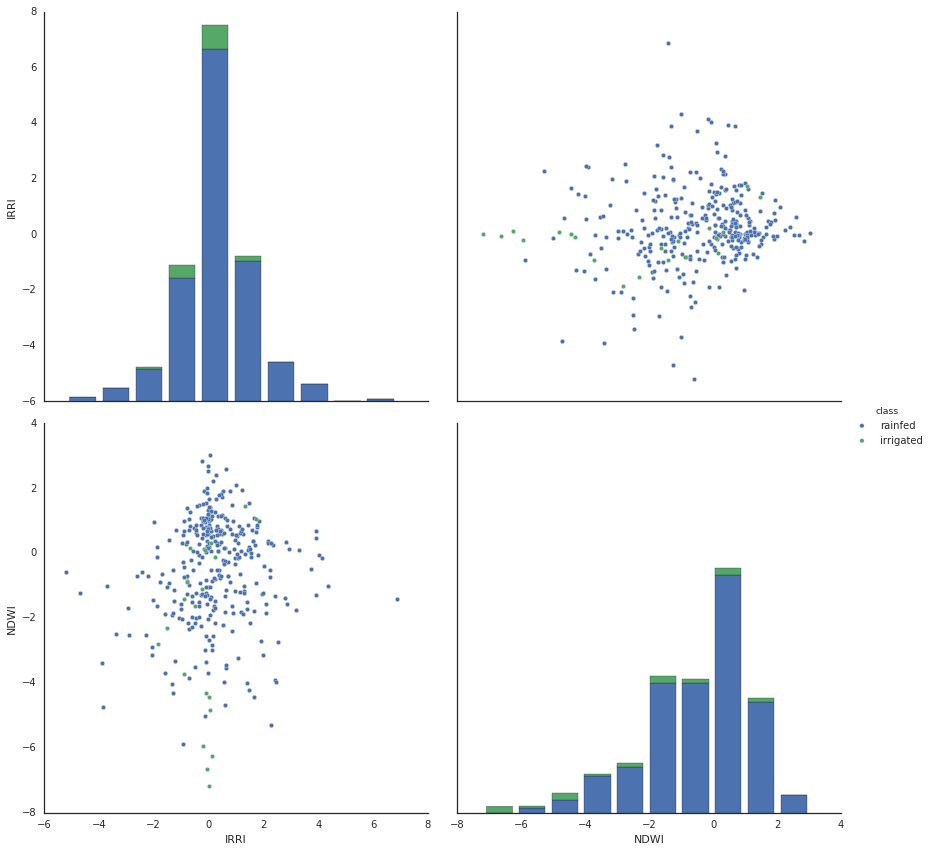

In [8]:
url = 'https://raw.githubusercontent.com/suredream/geenotebook/master/irri_full_chart2.csv'
# https://github.com/suredream/geenotebook/blob/master/irrigation-indice.csv
iris = pd.read_csv(url)
import seaborn as sns
sns.pairplot(iris, hue="class", size=6, vars=["IRRI", "NDWI"])
sns.set(style="white", color_codes=True)
# sns.pairplot(iris, hue="l2", size=3)


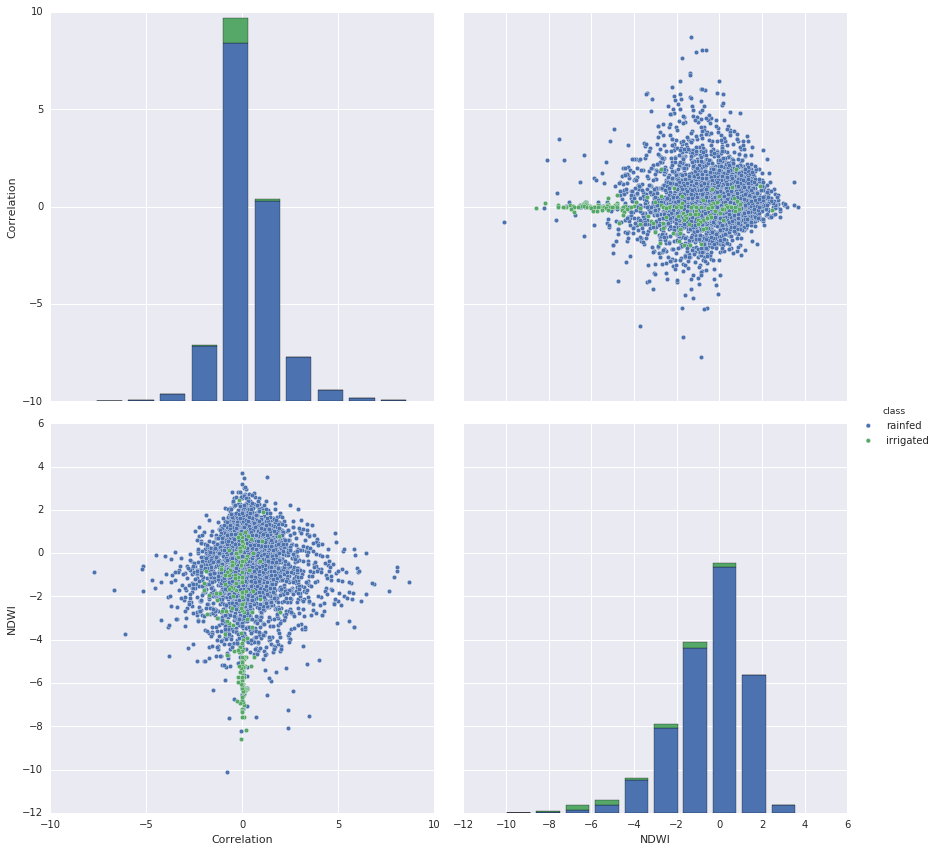

In [3]:
url = 'https://raw.githubusercontent.com/suredream/geenotebook/master/irri_full_chart4.csv'
# https://github.com/suredream/geenotebook/blob/master/irrigation-indice.csv
iris = pd.read_csv(url)
import seaborn as sns
sns.pairplot(iris, hue="class", size=6, vars=["Correlation", "NDWI"])
sns.set(style="white", color_codes=True)
# sns.pairplot(iris, hue="l2", size=3)


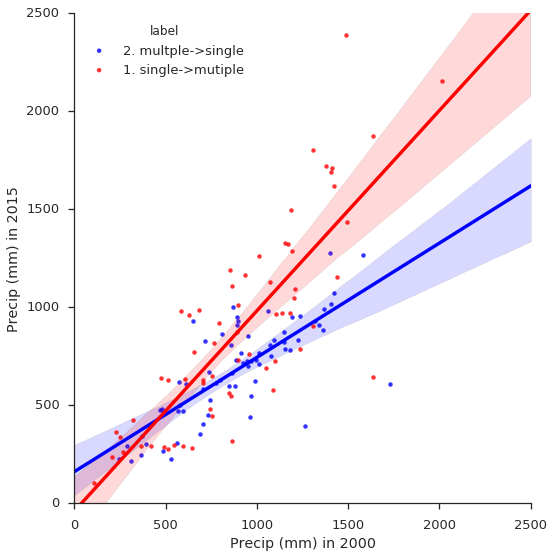

In [70]:
import pandas as pd, seaborn as sns
df = pd.read_csv('intensity_conv1.csv')
sns.set(style="ticks", context="talk")

palette = ["#0000ff","#ff0000"]
# Plot tip as a function of toal bill across days
g = sns.lmplot(x="P2000", y="P2", hue="label", data=df, palette=sns.color_palette(palette), size=8, legend_out=False)
# g.despine(left=True)
g.set_axis_labels("Precip (mm) in 2000", "Precip (mm) in 2015")
g.set(xlim=(0, 2500),ylim=(0, 2500))